In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../../files/data.csv')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day,flight_time,Duration(sec)
0,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2,No info,17135,2019,1,3,morning,140700
1,Air India,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1,1 Long layover,14594,2019,1,3,morning,75900
2,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1,1 Long layover,22270,2019,1,3,afternoon,63300
3,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1,No info,26890,2019,1,3,morning,79500
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,0,No info,12649,2019,1,3,evening,10500


In [6]:
data.shape

(10462, 16)

In [8]:
draft = data.select_dtypes(include=['int'])
draft.shape

(10462, 6)

In [10]:
draft.head()

,Total_Stops,Price,year,month,Day,Duration(sec)
0,2,17135,2019,1,3,140700
1,1,14594,2019,1,3,75900
2,1,22270,2019,1,3,63300
3,1,26890,2019,1,3,79500
4,0,12649,2019,1,3,10500


In [12]:
draft.isna().sum()

Total_Stops      0
Price            0
year             0
month            0
Day              0
Duration(sec)    0
dtype: int64

<Axes: >

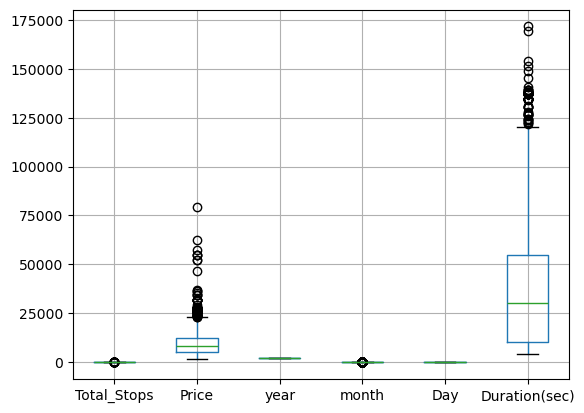

In [14]:
draft.boxplot()

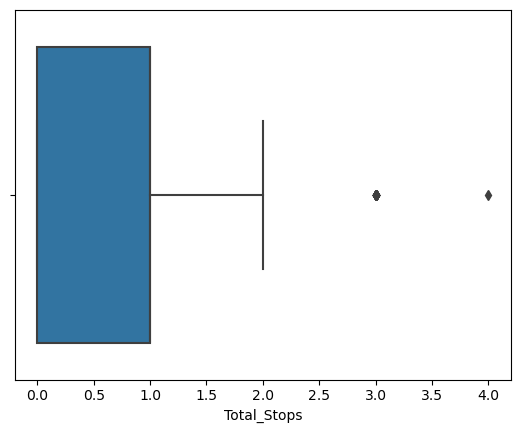

In [44]:
sns.boxplot(x='Total_Stops', data=draft)
plt.show()

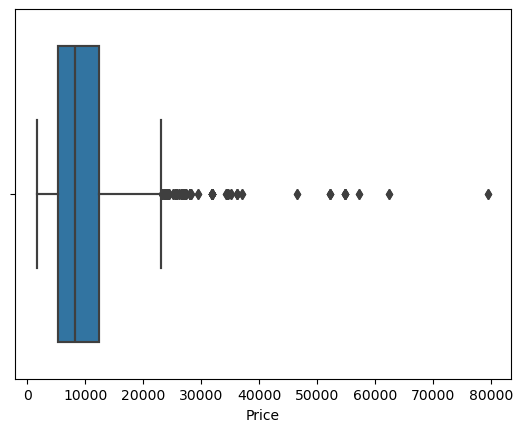

In [50]:
sns.boxplot(x='Price', data=draft)
plt.show()

In [60]:
def handle_outliners(data, feature):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    xb = q1 - 1.5*(q3-q1)
    xh = q3 + 1.5*(q3-q1)
    outliners = data[(data[feature]<xb) | (data[feature]>xh)]
    outliners_values = outliners[feature]
    outliners_index = outliners.index
    return outliners, outliners_values, outliners_index

In [62]:
handle_outliners(draft, 'Price')

(      Total_Stops  Price  year  month  Day  Duration(sec)
 3               1  26890  2019      1    3          79500
 6               1  57209  2019      1    3          16800
 10              1  26890  2019      1    3          53100
 15              1  25735  2019      1    3          63000
 20              1  26890  2019      1    3          33000
 ...           ...    ...   ...    ...  ...            ...
 8205            2  52285  2019      6    3          30000
 8283            1  24318  2019      6    3          30900
 9206            2  23583  2019      9    3          27900
 9315            2  34608  2019      9    3          37800
 9561            1  34273  2019      9    5          45600
 
 [94 rows x 6 columns],
 3       26890
 6       57209
 10      26890
 15      25735
 20      26890
         ...  
 8205    52285
 8283    24318
 9206    23583
 9315    34608
 9561    34273
 Name: Price, Length: 94, dtype: int64,
 Index([   3,    6,   10,   15,   20,   22,   25,   26,   27,